**1.Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.**

Perform following tasks: bold text
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

**Step 1: Pre-process the Dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Load dataset
data = pd.read_csv('uber.csv')

# Handle missing values
data.dropna(inplace=True)

In [7]:
print(data.head())
column_names = data.columns
print(column_names)

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217              1.0  
1         -73.994710         40.750325              1.0  
2         -73.962565         40.772647              1.0  
3         

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98303 entries, 0 to 98303
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        98303 non-null  float64
 1   pickup_longitude   98303 non-null  float64
 2   pickup_latitude    98303 non-null  float64
 3   dropoff_longitude  98303 non-null  float64
 4   dropoff_latitude   98303 non-null  float64
 5   passenger_count    98303 non-null  float64
 6   hour               98303 non-null  int32  
 7   day                98303 non-null  int32  
 8   month              98303 non-null  int32  
dtypes: float64(6), int32(3)
memory usage: 6.4 MB


In [8]:
# Drop unnecessary columns
data.drop(columns=['Unnamed: 0', 'key'], inplace=True)

In [19]:
data.isnull().sum()

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
hour,0
day,0
month,0


In [18]:
# Handle missing values (if any)
data.dropna(inplace=True)

In [10]:
# Convert pickup_datetime to datetime format and extract features
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['hour'] = data['pickup_datetime'].dt.hour
data['day'] = data['pickup_datetime'].dt.day
data['month'] = data['pickup_datetime'].dt.month
data.drop(['pickup_datetime'], axis=1, inplace=True)

In [12]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['fare_amount', 'pickup_longitude', 'pickup_latitude',
                      'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [13]:
# Split dataset into features and target variable
X = data.drop('fare_amount', axis=1)
y = data['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 2: Identify Outliers**

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

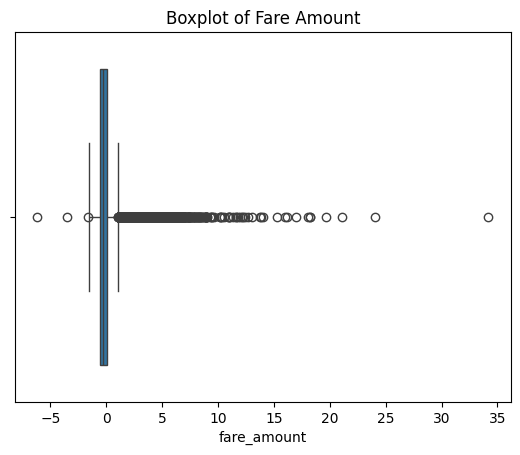

In [15]:
# Boxplot to identify outliers in fare_amount
sns.boxplot(x=data['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.show()

**Step 3: Check the Correlation**

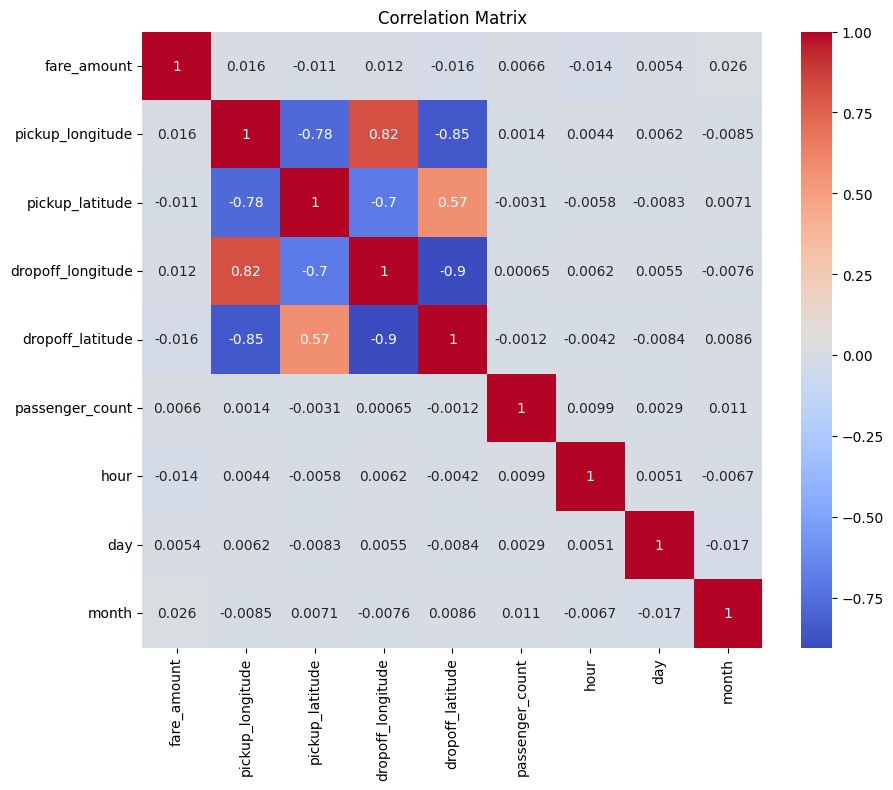

In [20]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Step 4: Implement Linear Regression and Random Forest Regression Models**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Step 5: Evaluate the Models**

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [24]:
# Linear Regression Predictions
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)

In [25]:
# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [26]:
# Display the scores
print("Linear Regression: R2 =", r2_linear, "RMSE =", rmse_linear, "MAE =", mae_linear)
print("Random Forest: R2 =", r2_rf, "RMSE =", rmse_rf, "MAE =", mae_rf)

Linear Regression: R2 = 0.0016350014854743522 RMSE = 1.0068934106765577 MAE = 0.613760916902508
Random Forest: R2 = 0.7341797038138578 RMSE = 0.5195566335712584 MAE = 0.23325399523101215
